## Analyze Phase
**By: Faiz Yah (30th December 2023, Lyon-France)**

For the analyze phase, I carried out exploratory data analysis to identify trends and relationship.
I will be using **plotly express** for my data visualizations.

The questions that I explored are as follows:

1. Numbers about the members and non-members
    - Considering all the rides, how many were members and non-members.
    - What are the percentage of them?
    
2. Numbers of rides
    - 2.1 Numbers of rides by member types across days of the weeks
    - 2.2 Numbers of rides by member types across the months
    
3. Trip durations
    - 3.1 Trip durations by member types across days of the weeks
    - 3.2 Trip durations by member types across the months

4. Type of bikes
    - 4.1 Which bikes are most popular by member types across the months

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('cycle_cleaned.csv')
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,day,date,month,year,ride_duration
0,9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,member,Sunday,24,January,2021,7.216667
1,10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,member,Saturday,23,January,2021,4.533333
2,11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,casual,Saturday,9,January,2021,9.783333
3,12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,casual,Saturday,9,January,2021,8.950000
4,13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,casual,Sunday,24,January,2021,10.150000


1. Numbers about the members and non-members
    - How many members, how many non-members?
    - What are the percentage of them?

In [3]:
# Considering all the rides, how many were members and non-members. (Way 1)
members_amount = df.groupby('member_casual', as_index=False)['ride_id'].count()
members_amount

,member_casual,ride_id
0,casual,2048302
1,member,2539802


In [4]:
# Considering all the rides, how many were members and non-members. (Way 2)
df['member_casual'].value_counts()

member    2539802
casual    2048302
Name: member_casual, dtype: int64

In [5]:
# What are the percentage of them?
member_percentage = df['member_casual'].value_counts(normalize = True)*100
member_percentage

member    55.356243
casual    44.643757
Name: member_casual, dtype: float64

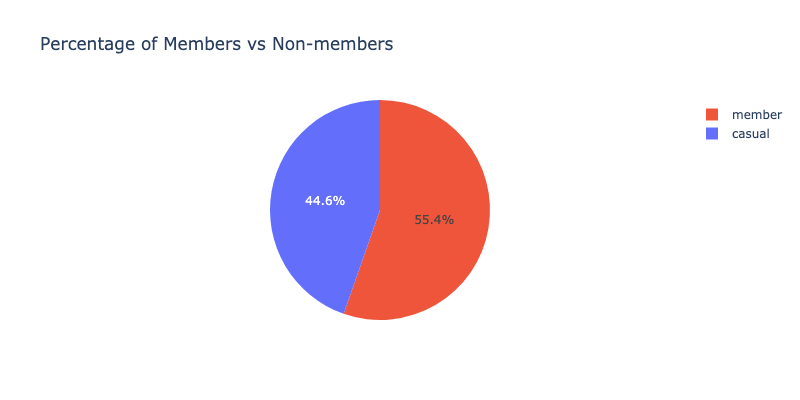

In [6]:
# Create a pie chart that represent the members and non-members?
fig = px.pie(members_amount, values='ride_id', names='member_casual', color='member_casual',
       title='Percentage of Members vs Non-members', width=800, height=400)
fig.show("png")

### 2. Numbers of rides

### 2.1  Numbers of rides by member types across days of the weeks

In [7]:
rides_week = df.groupby(['member_casual','day'], as_index=False)['ride_id'].count()
rides_week

,member_casual,day,ride_id
0,casual,Friday,290034
1,casual,Monday,228931
2,casual,Saturday,468318
3,casual,Sunday,403754
4,casual,Thursday,224204
5,casual,Tuesday,214932
6,casual,Wednesday,218129
7,member,Friday,365774
8,member,Monday,346476
9,member,Saturday,357070


In [8]:
# Notice that the day are not in the order that we want, we can adjust in using Categorical
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=days, ordered=True)

rides_week = df.groupby(['member_casual','day'], as_index=False)['ride_id'].count()
rides_week

,member_casual,day,ride_id
0,casual,Monday,228931
1,casual,Tuesday,214932
2,casual,Wednesday,218129
3,casual,Thursday,224204
4,casual,Friday,290034
5,casual,Saturday,468318
6,casual,Sunday,403754
7,member,Monday,346476
8,member,Tuesday,388120
9,member,Wednesday,397681


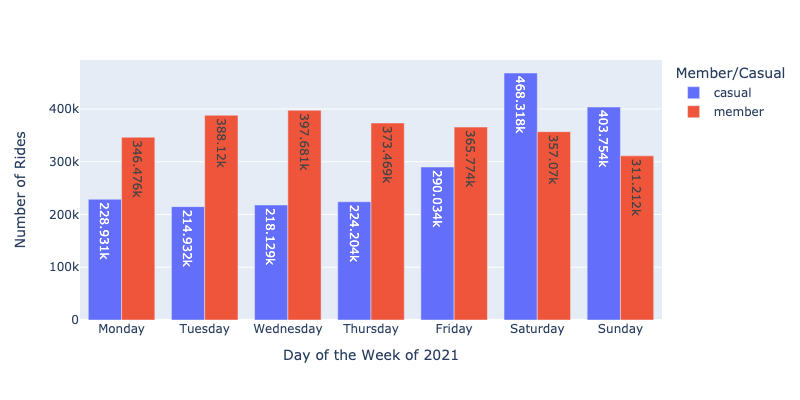

In [10]:
# 2.1 Numbers of rides by member types across days of the weeks

fig = px.bar(rides_week, x = 'day', y = 'ride_id', color = 'member_casual', 
       barmode='group', 
       labels = {'ride_id':'Number of Rides', 'day':'Day of the Week of 2021', 'member_casual':'Member/Casual'},
       text_auto=True,
       width=800, height=400)
fig.show("png")